## Fundamentos de Deep Learning

### Santiago Ríos Guiral

### Universidad de Antioquia

### Análisis exploratorio de la base de datos CIC-IDS2017

## [CICIDS2017](https://www.unb.ca/cic/datasets/ids-2017.html)

#### En este proyecto se va a utilizar la base de datos Intrusion Detection Evaluation Dataset (CIC-IDS2017). El desarrollo de una base de datos confiable de tráfico de red es fundamental para la evaluación y mejora de los sistemas de ciberseguridad. En particular, los sistemas de detección de intrusiones (IDS) son herramientas críticas para contrarrestar los ataques cada vez más sofisticados y frecuentes

#### la base de datos CIC-IDS2017 se presenta como una solución valiosa para la comunidad de la ciberseguridad, ya que proporciona una base de datos confiable para la evaluación de sistemas de detección de intrusiones (IDS) y otros sistemas de defensa. CIC-IDS2017 contiene tráfico benigno y anómalo, los cuales se asemejan a paquetes reales encontrados en la redes de computadores. Esta base de datos organiza el tráfico en archivos PCAP. Asimismo, el tráfico también se encuentra en formato CSV, donde se utilizó el extractor CICFlowMeter para organizar estos flujos dentro de los archivos.

#### El periodo de captura de datos comenzó el lunes 3 de julio de 2017 y finalizó el viernes 7 de julio de 2017, lo que supone un total de 5 días. Incluye tráfico normal y los ataques implementados incluyen FTP de fuerza bruta, SSH de fuerza bruta, DoS, Heartbleed, ataque web, infiltración, botnet y DDoS.

#### A continuación se presentan los flujos disponbiles en la base de datos:

- Monday-WorkingHours: 529919

- Tuesday-WorkingHours: 445910

- Wednesday-workingHours: 692704

- Thursday-WorkingHours-Afternoon-WebAttacks: 170367

- Thursday-WorkingHours-Morning-WebAttacks: 288603

- Friday-WorkingHours-Morning: 191034

- Friday-WorkingHours-Afternoon-PortScan: 286468

- Friday-WorkingHours-Afternoon-DDos: 225746



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from string import ascii_letters

In [2]:
# Lectura de los archivos csv
base =  "cicids2017/"
df1 = pd.read_csv(base+"Friday-WorkingHours-Afternoon-DDos.csv")
df2 = pd.read_csv(base+"Friday-WorkingHours-Afternoon-PortScan.csv")
df3 = pd.read_csv(base+"Friday-WorkingHours-Afternoon-PortScan.csv")
df4 = pd.read_csv(base+"Monday-WorkingHours.csv")
df5 = pd.read_csv(base+"Thursday-WorkingHours-Afternoon-Infilteration.csv")
df6 = pd.read_csv(base+"Thursday-WorkingHours-Morning-WebAttacks.csv")
df7 = pd.read_csv(base+"Tuesday-WorkingHours.csv")
df8 = pd.read_csv(base+"Wednesday-workingHours.csv")

# Concatenar los diferentes archivos en uno solo
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis='index')
print(df.shape)
df.head(8)

(2926177, 85)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
5,192.168.10.5-104.20.10.120-54871-443-6,104.20.10.120,443,192.168.10.5,54871,6,7/7/2017 3:30,1022,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
6,192.168.10.5-104.20.10.120-54925-443-6,104.20.10.120,443,192.168.10.5,54925,6,7/7/2017 3:30,4,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7,192.168.10.5-104.20.10.120-54925-443-6,104.20.10.120,443,192.168.10.5,54925,6,7/7/2017 3:30,42,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926177 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  int64  
 3    Destination IP               object 
 4    Destination Port             int64  
 5    Protocol                     int64  
 6    Timestamp                    object 
 7    Flow Duration                int64  
 8    Total Fwd Packets            int64  
 9    Total Backward Packets       int64  
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mean

(-1.25, 1.25, -1.25, 1.25)

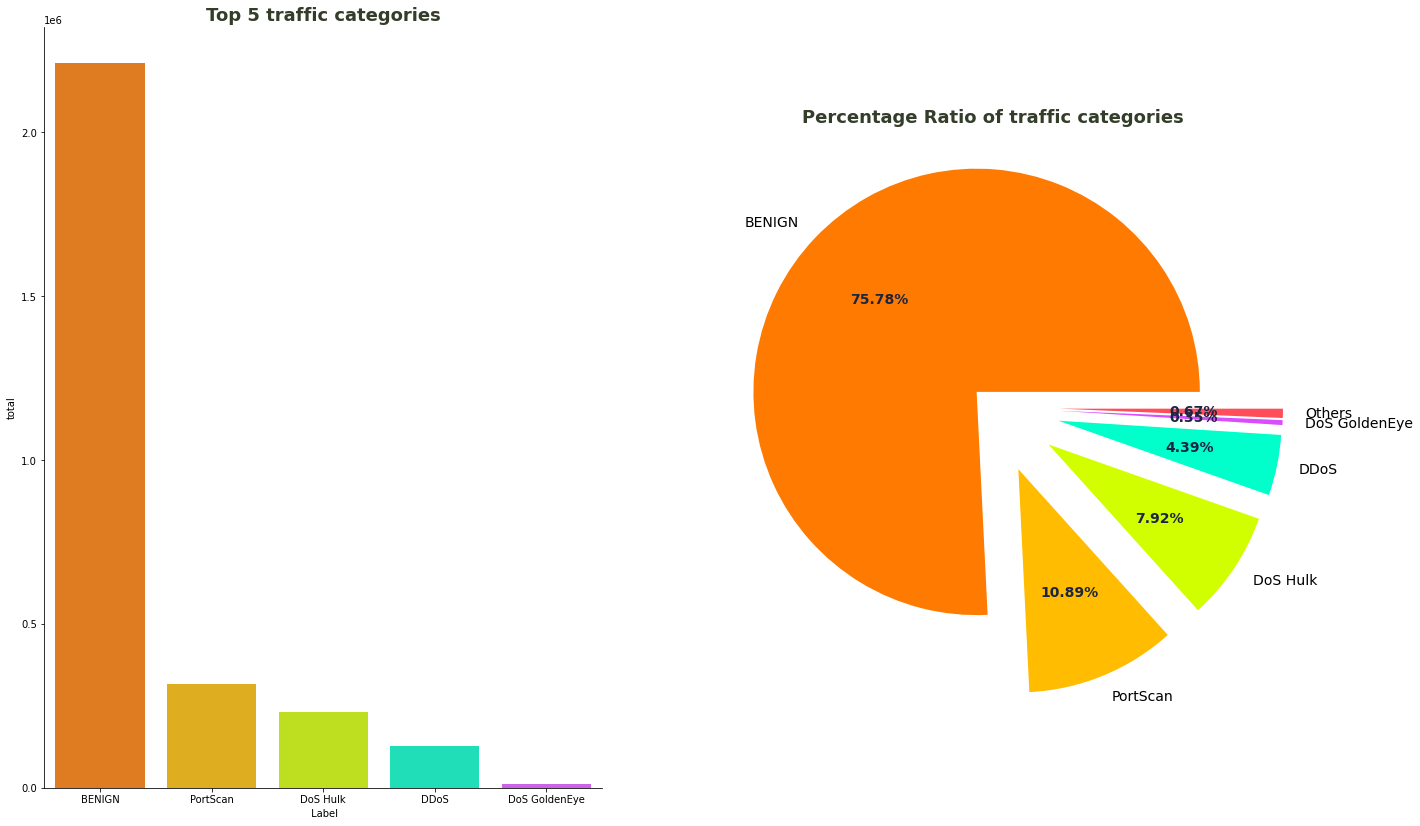

In [4]:
# Categorias del tráfico

traffic_list = []
for i in df[' Label']:
    traffic_list.append(i)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,14))

df_plot = pd.DataFrame(Counter(traffic_list).most_common(5), columns=[' Label', 'total'])
ax = sns.barplot(data=df_plot, x=' Label', y='total', ax=axes[0], palette=['#ff7a00', '#ffbc00', '#d2ff00', '#00ffcb', '#d94dff'])
ax.set_title('Top 5 traffic categories', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(traffic_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {' Label': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of traffic categories', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot[' Label'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0.1,0.3,0.3,0.3,0.3,0.3], colors=['#ff7a00', '#ffbc00', '#d2ff00', '#00ffcb', '#d94dff', '#ff4d5a'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

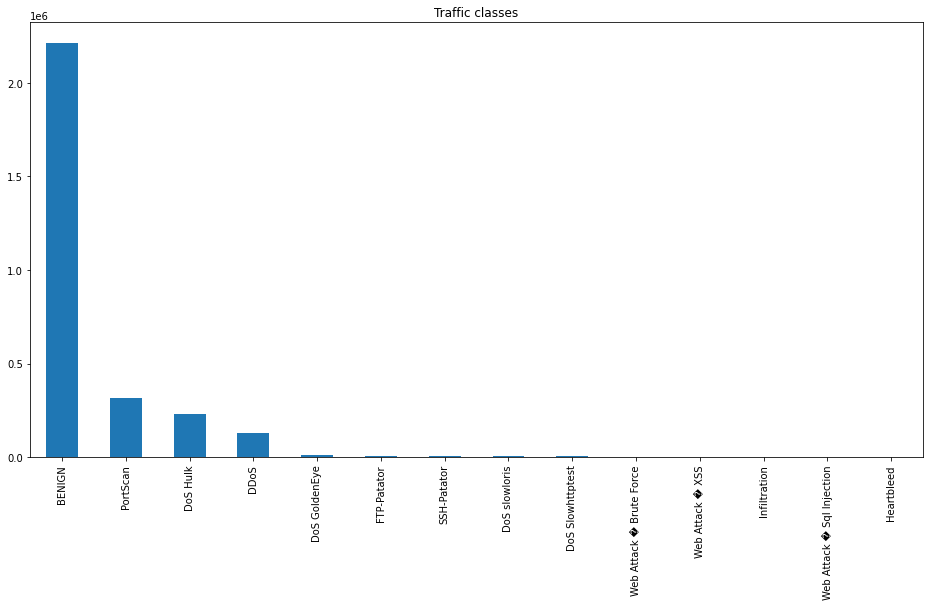

In [5]:
plt.figure(figsize = (16,8))
classes = df[' Label'].value_counts().plot(kind='bar', title='Traffic classes')

In [6]:
# Asignar valores númericos a los ataques y al tráfico normal
df[' Label'] = df[' Label'].replace('BENIGN',0)
df[' Label'] = df[' Label'].replace('PortScan',1)
df[' Label'] = df[' Label'].replace('DoS Hulk',1)
df[' Label'] = df[' Label'].replace('DDoS',1)
df[' Label'] = df[' Label'].replace('DoS GoldenEye',1)
df[' Label'] = df[' Label'].replace('FTP-Patator',1)
df[' Label'] = df[' Label'].replace('SSH-Patator',1)
df[' Label'] = df[' Label'].replace('DoS slowloris',1)
df[' Label'] = df[' Label'].replace('DoS Slowhttptest',1)
df[' Label'] = df[' Label'].replace('Web Attack � Brute Force',1)
df[' Label'] = df[' Label'].replace('Web Attack � XSS',1)
df[' Label'] = df[' Label'].replace('Infiltration',1)
df[' Label'] = df[' Label'].replace('Web Attack � Sql Injection',1)
df[' Label'] = df[' Label'].replace('Heartbleed',1)

print(df[' Label'].value_counts())

0    2211567
1     714610
Name:  Label, dtype: int64


(-1.25, 1.25, -1.25, 1.25)

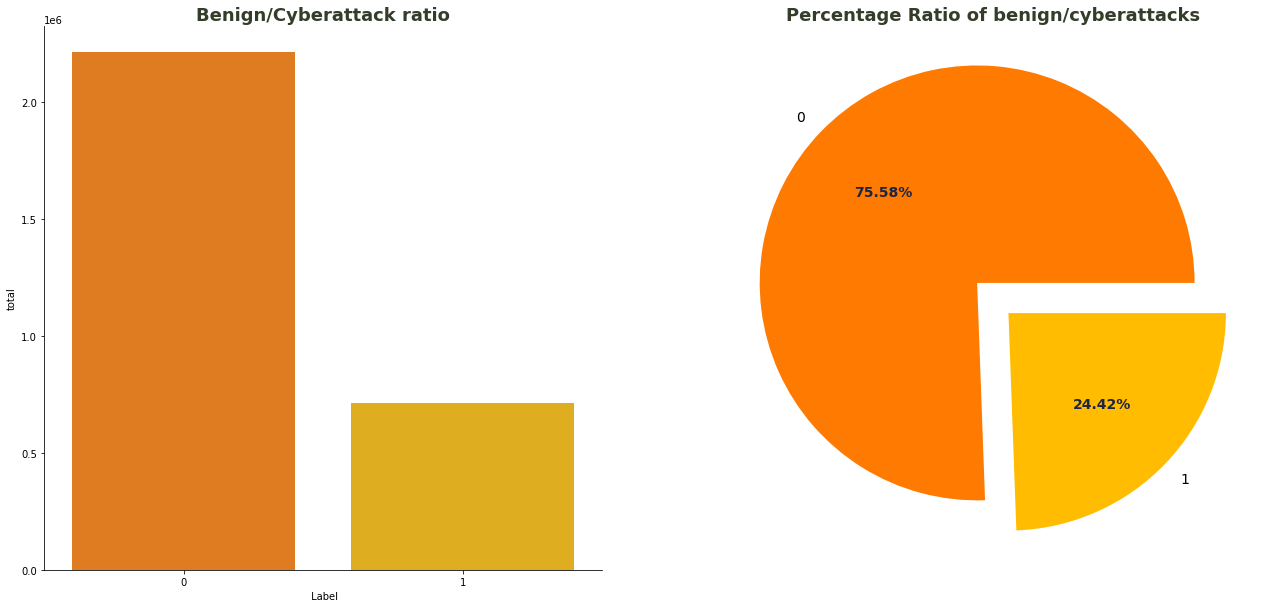

In [7]:
traffic_list = []
for i in df[' Label']:
    traffic_list.append(i)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,10))

df_plot = pd.DataFrame(Counter(traffic_list).most_common(2), columns=[' Label', 'total'])
ax = sns.barplot(data=df_plot, x=' Label', y='total', ax=axes[0], palette=['#ff7a00', '#ffbc00'])
ax.set_title('Benign/Cyberattack ratio', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(traffic_list)]).transpose().sort_values(by=0, ascending=False)
plt.title('Percentage Ratio of benign/cyberattacks', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot[' Label'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0.1,0.1], colors=['#ff7a00', '#ffbc00'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

In [8]:
df.head(4)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
print(df[' Protocol'].value_counts())
filt = df[' Protocol'] == 0
n = df.loc[filt][' Label'].value_counts()
print(n)

6     1960612
17     963920
0        1645
Name:  Protocol, dtype: int64
0    1633
1      12
Name:  Label, dtype: int64


In [10]:
print(df[' Source Port'].value_counts())
filt = df[' Source Port'] == 0
n = df.loc[filt][' Label'].value_counts()
print(n)

443      274215
80       120637
123       20922
137        7469
22         4956
          ...  
28793         1
990           1
25269         1
12107         1
12912         1
Name:  Source Port, Length: 64631, dtype: int64
0    1633
1      12
Name:  Label, dtype: int64


In [11]:
print(df[' Destination Port'].value_counts())
filt = df[' Protocol'] == 0
n = df.loc[filt][' Label'].value_counts()
print(n)

53       926438
80       615060
443      493417
123       20924
22        16852
          ...  
4412          1
31395         1
31371         1
31369         1
16210         1
Name:  Destination Port, Length: 53569, dtype: int64
0    1633
1      12
Name:  Label, dtype: int64


In [12]:
print(df.shape)
df = df.loc[(df[" Destination Port"] != 0)]
df = df.loc[(df[" Source Port"] != 0)]
df = df.loc[(df[" Protocol"] != 0)]
print(df.shape)

# Descartar filas con NaN
df = df.dropna()
print(df.shape)

# Descartar filas con Infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
print(df.shape)

(2926177, 85)
(2924532, 85)
(2923187, 85)
(2921416, 85)


In [13]:
# Descartan columnas que no aportan información al modelo
df.drop(columns=['Flow ID',' Source IP',' Destination IP', ' Protocol', ' Timestamp'], inplace=True)

df.shape

(2921416, 80)

In [14]:
count_benign, count_attacks = df[' Label'].value_counts()

print("Benign flows:", count_benign)
print("Attack flows", count_attacks)

Benign flows: 2208024
Attack flows 713392


In [15]:
# Guarda el archivo csv con la clase de trafico balanceada
benign = df.loc[(df[" Label"] != 1)]
attacks = df.loc[(df[" Label"] != 0)]

benign_balance = benign.sample(count_attacks)
balance_df = pd.concat([benign_balance, attacks], axis=0)

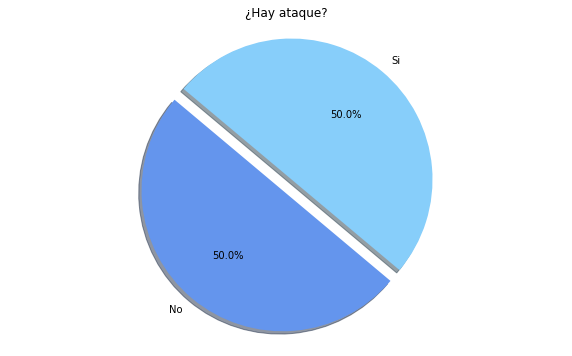

In [16]:
labels = 'No', 'Si'
sizes = [sum((balance_df[' Label']==0)*1), sum((balance_df[' Label']==1)*1)]
colors = ['cornflowerblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Balance de las clases
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('¿Hay ataque?')
plt.show()

<AxesSubplot:>

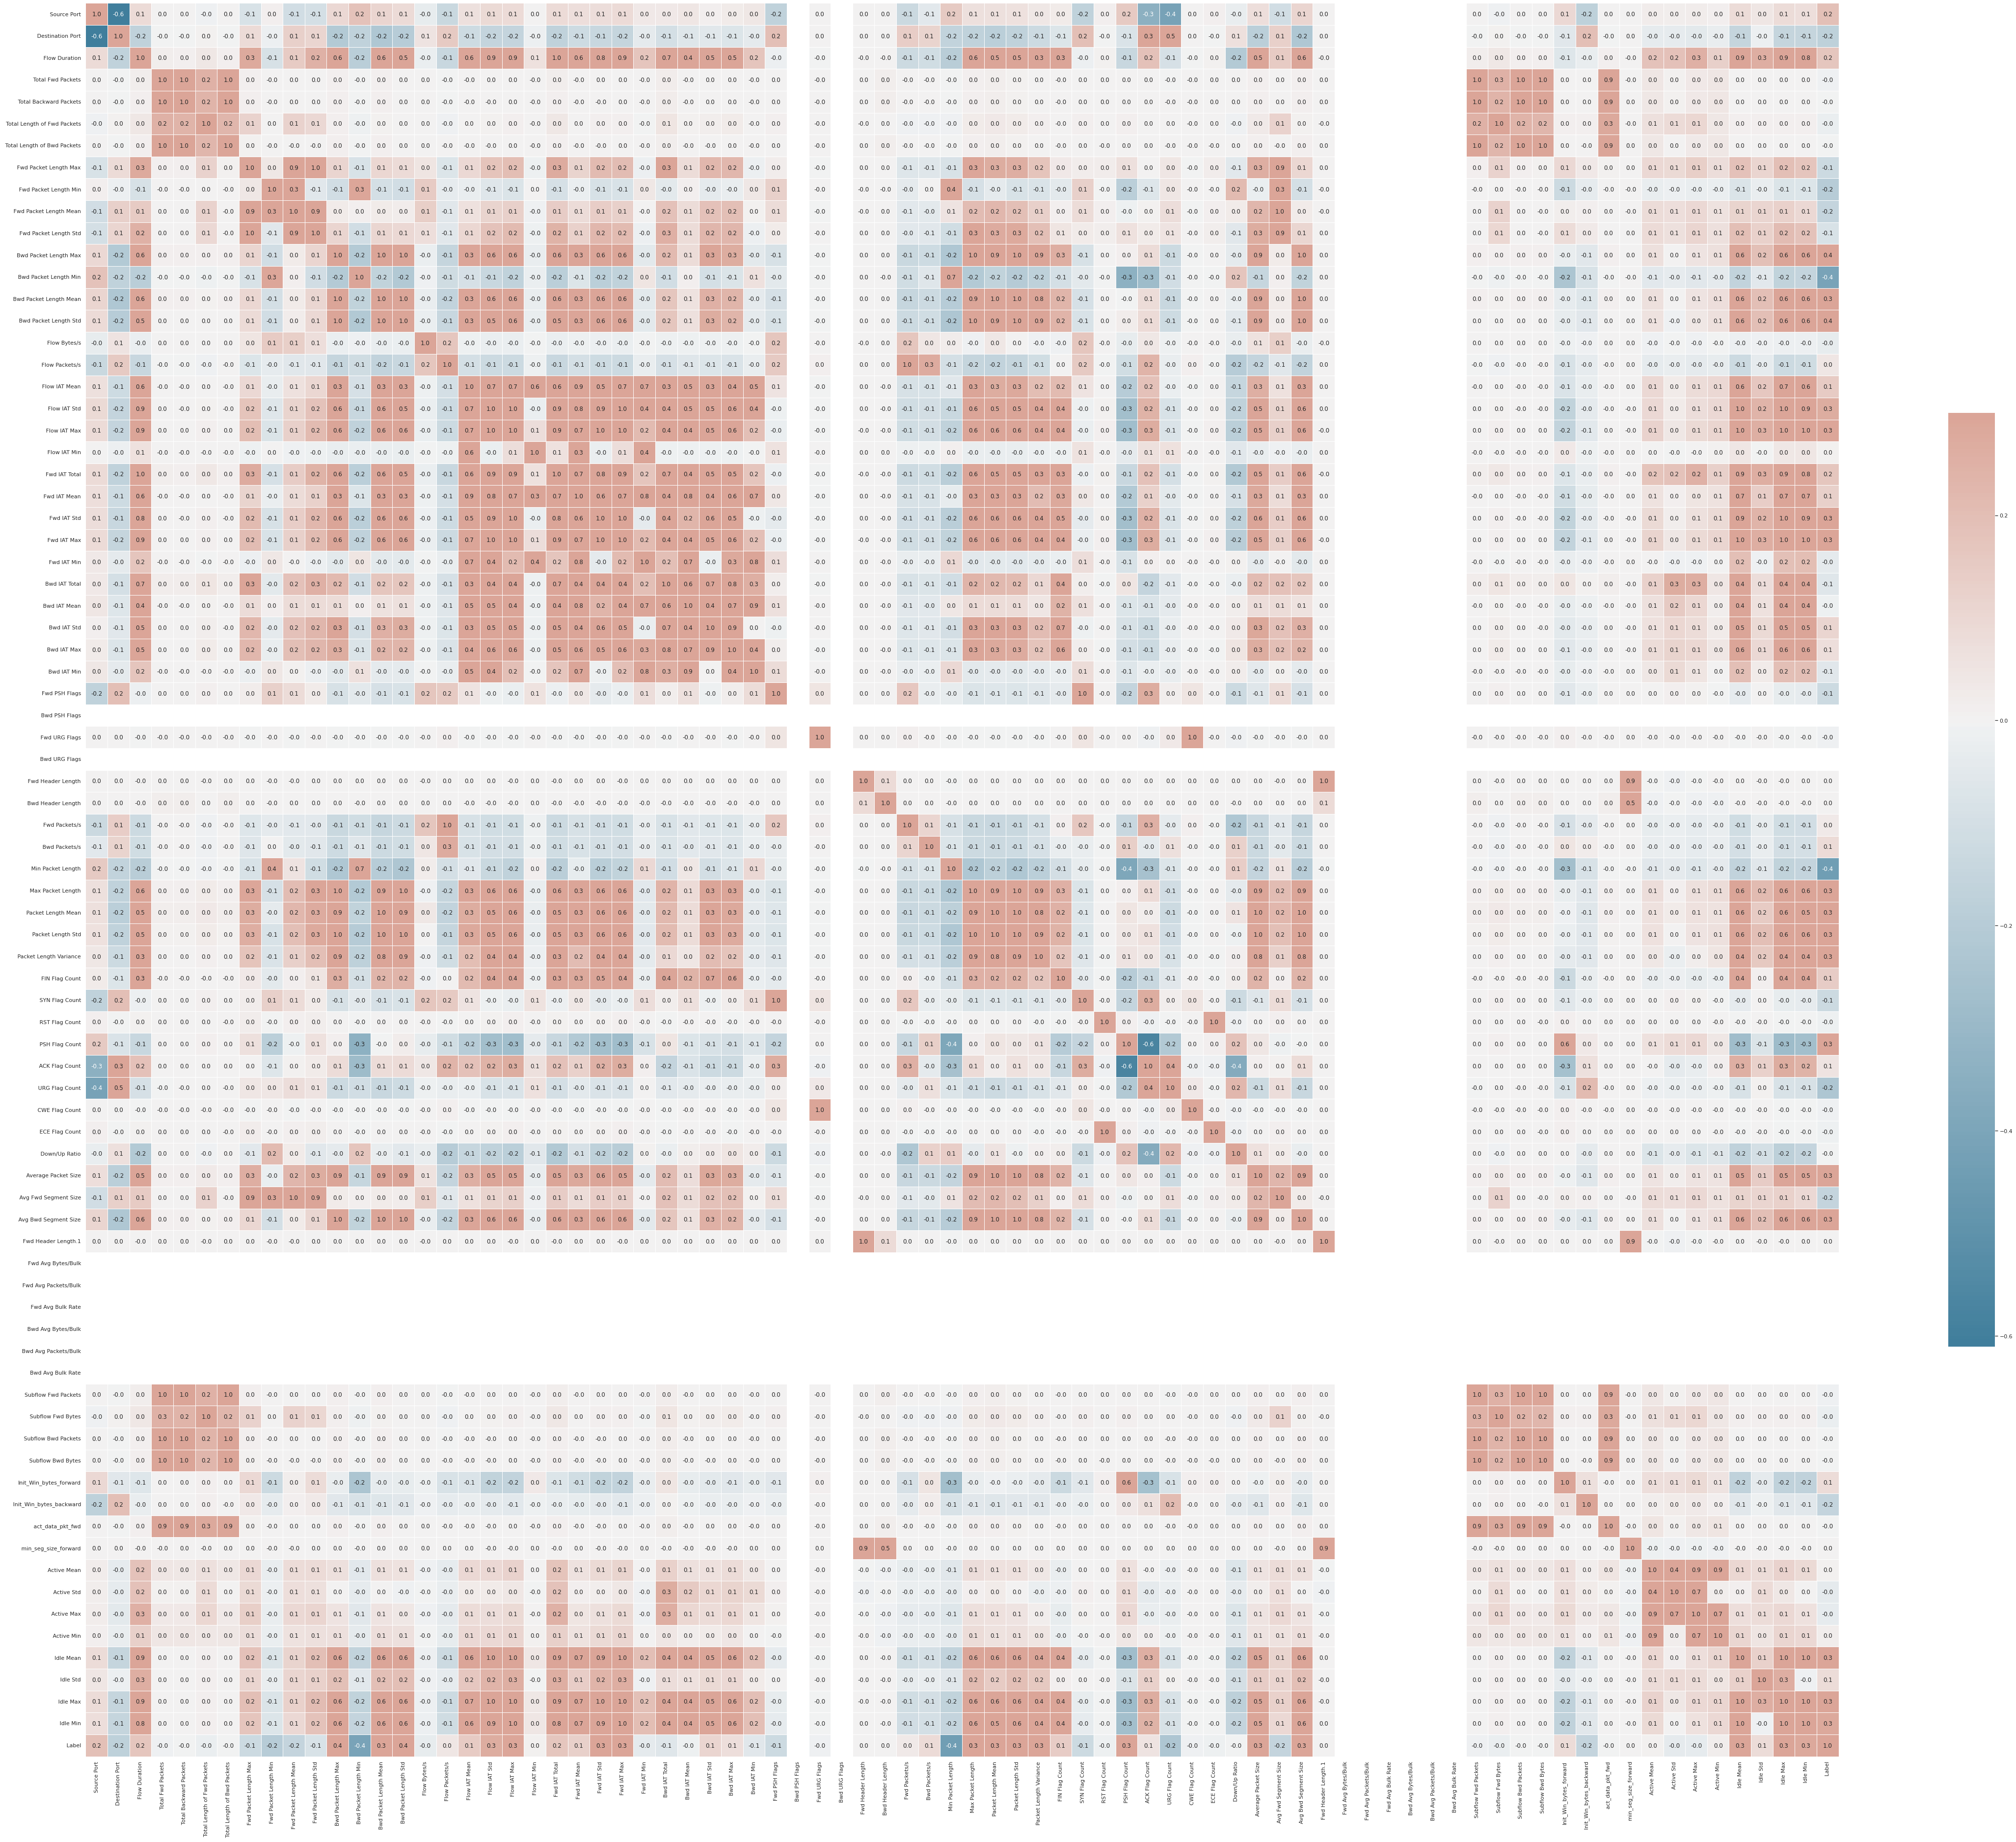

In [17]:
# Correlacion entre las variables
sns.set_theme(style="white")

# Compute the correlation matrix
corr = balance_df.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(80, 70))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

In [18]:
print(balance_df.shape)

# Descartando las variables que no cambian su valor para todas las observaciones
balance_df.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], inplace=True)

# Descartando las variables con correlacion perfecta - No aportan a la variabilidad
balance_df.drop(columns=[' CWE Flag Count', ' ECE Flag Count', ' Fwd Header Length.1'], inplace=True)

print(balance_df.shape)

(1426784, 80)
(1426784, 69)


In [19]:
# Guarda el archivo csv con el balance de las clases

balance_df = balance_df.sample(frac=1).reset_index()
balance_df.drop(columns=['index'], inplace=True)
balance_df.to_csv("cicids2017_balanced.csv", index=False)

In [20]:
# Guarda el archivo csv con el desbalance 75/25

#df = df.sample(frac=1).reset_index()
#df.to_csv("cicids2017.csv", index=False)